# FrozenLake Q-Learning using Neural Network

FrozenLake problem resolution using neural network with Tensorflow.
See [online example](https://gym.openai.com/evaluations/eval_UaLF7xtQSNyODLUblAhfVg) at Gym OpenAI.

In [23]:
import numpy as np
import random
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import tensorflow as tf

In [24]:
env = gym.make('FrozenLake-v0')
env = wrappers.Monitor(env, 'FrozenLake-record',force=True)

[2017-08-25 17:53:31,977] Making new env: FrozenLake-v0
[2017-08-25 17:53:31,981] Clearing 2 monitor files from previous run (because force=True was provided)


## Config

In [25]:
# Env variables
nb_states = 16
nb_actions = 4

# Training tuning
e = 1.0
e_decay = 0.999
y = .95
lr = .8

# Training loop
nb_max_episodes = 10000
episode_count = 0
total_steps = 0
test_freq = 50
log_freq = 500

## Training

### Init Q-Table

In [26]:
x = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(x,W)

nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
update_model = trainer.minimize(loss)

### Test accurracy

In [27]:
def test_accurracy():
    test_batch_size = 200
    c = 0
    nb_success = 0.0
    while c < test_batch_size:
        is_gameover = False
        state = env.reset()
        while not is_gameover:
            Q1 = sess.run(Qout, feed_dict={x: np.identity(16)[state:state+1]})[0]
            action = np.argmax(Q1)
            next_state, reward, is_gameover, _ = env.step(action)
            state = next_state
        if reward == 1:
            nb_success += 1
        c += 1
    return nb_success / c

### Training Loop

In [28]:
accurracies = []
rewards = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    while episode_count < nb_max_episodes:
        state = env.reset()
        is_gameover = False
        reward_tot = 0
        episode_step = 0
        
        while not is_gameover:
            episode_step += 1

            # Eval current state
            Q1 = sess.run(Qout, feed_dict={x: np.identity(16)[state:state+1]})[0]
            
            if random.random() < e:
                action = random.randint(0, nb_actions-1)
            else:
                action = np.argmax(Q1)

            # Play best move with chance of random
            next_state, reward, is_gameover, _ = env.step(action)

            # Eval next state
            Q2 = sess.run(Qout, feed_dict={x: np.identity(16)[next_state:next_state+1]})[0]
            
            # Update first state evaluation
            Q1[action] += lr * (reward + y*np.max(Q2) - Q1[action])
            sess.run(update_model,feed_dict={x: np.identity(16)[state:state+1], nextQ:[Q1]})

            reward_tot += reward
            total_steps += 1
            state = next_state

            if is_gameover:
                break

        e *= e_decay

        if episode_count % test_freq == 0 and episode_count != 0:
            accurr = test_accurracy()
            accurracies.append(accurr)

            if episode_count % log_freq == 0:
                print('step: %s, episode: %s, accurracy: %s. random move probability: %s' % (total_steps, episode_count, accurr, e))

        episode_count += 1
        rewards.append(reward_tot)
    env.close()

[2017-08-25 17:53:50,761] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video000000.json
[2017-08-25 17:53:50,788] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video000001.json
[2017-08-25 17:53:50,858] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video000008.json
[2017-08-25 17:53:50,989] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video000027.json
[2017-08-25 17:53:51,185] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video000064.json
[2017-08-25 17:53:51,317] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigy

step: 3755, episode: 500, accurracy: 0.055. random move probability: 0.6057725659163237


[2017-08-25 17:54:00,997] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video003000.json
[2017-08-25 17:54:08,538] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video004000.json
[2017-08-25 17:54:18,014] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video005000.json


step: 10006, episode: 1000, accurracy: 0.145. random move probability: 0.36732772934619257


[2017-08-25 17:54:27,880] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video006000.json
[2017-08-25 17:54:39,112] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video007000.json


step: 18935, episode: 1500, accurracy: 0.415. random move probability: 0.22273980093919937


[2017-08-25 17:54:48,961] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video008000.json
[2017-08-25 17:55:00,546] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video009000.json
[2017-08-25 17:55:11,860] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video010000.json


step: 29052, episode: 2000, accurracy: 0.635. random move probability: 0.13506472547210188


[2017-08-25 17:55:20,472] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video011000.json
[2017-08-25 17:55:32,741] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video012000.json


step: 40847, episode: 2500, accurracy: 0.69. random move probability: 0.08190040571973876


[2017-08-25 17:55:43,420] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video013000.json
[2017-08-25 17:55:54,568] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video014000.json
[2017-08-25 17:56:06,536] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video015000.json


step: 54492, episode: 3000, accurracy: 0.355. random move probability: 0.049662681604038215


[2017-08-25 17:56:18,802] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video016000.json
[2017-08-25 17:56:31,824] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video017000.json


step: 70389, episode: 3500, accurracy: 0.765. random move probability: 0.030114404470033673


[2017-08-25 17:56:45,060] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video018000.json
[2017-08-25 17:56:58,332] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video019000.json
[2017-08-25 17:57:09,601] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video020000.json


step: 86323, episode: 4000, accurracy: 0.44. random move probability: 0.018260740807661956


[2017-08-25 17:57:23,440] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video021000.json
[2017-08-25 17:57:36,688] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video022000.json


step: 103431, episode: 4500, accurracy: 0.755. random move probability: 0.011072928743333644


[2017-08-25 17:57:49,407] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video023000.json
[2017-08-25 17:58:01,743] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video024000.json
[2017-08-25 17:58:15,373] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video025000.json


step: 120360, episode: 5000, accurracy: 0.705. random move probability: 0.006714390847905742


[2017-08-25 17:58:29,701] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video026000.json
[2017-08-25 17:58:44,006] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video027000.json


step: 139689, episode: 5500, accurracy: 0.72. random move probability: 0.004071465237738676


[2017-08-25 17:58:58,332] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video028000.json
[2017-08-25 17:59:10,101] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video029000.json
[2017-08-25 17:59:24,228] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video030000.json


step: 158779, episode: 6000, accurracy: 0.76. random move probability: 0.0024688507948989738


[2017-08-25 17:59:39,753] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video031000.json
[2017-08-25 17:59:54,842] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video032000.json


step: 179596, episode: 6500, accurracy: 0.73. random move probability: 0.0014970591400305351


[2017-08-25 18:00:09,363] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video033000.json
[2017-08-25 18:00:23,369] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video034000.json
[2017-08-25 18:00:37,974] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video035000.json


step: 199705, episode: 7000, accurracy: 0.74. random move probability: 0.0009077851417265054


[2017-08-25 18:00:52,166] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video036000.json
[2017-08-25 18:01:06,694] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video037000.json


step: 220586, episode: 7500, accurracy: 0.6. random move probability: 0.0005504617964007802


[2017-08-25 18:01:19,590] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video038000.json
[2017-08-25 18:01:33,392] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video039000.json
[2017-08-25 18:01:47,615] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video040000.json


step: 239809, episode: 8000, accurracy: 0.715. random move probability: 0.0003337884432878974


[2017-08-25 18:02:02,013] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video041000.json
[2017-08-25 18:02:16,489] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video042000.json


step: 259970, episode: 8500, accurracy: 0.71. random move probability: 0.00020240228404777254


[2017-08-25 18:02:31,104] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video043000.json
[2017-08-25 18:02:45,192] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video044000.json
[2017-08-25 18:02:56,550] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video045000.json


step: 278759, episode: 9000, accurracy: 0.47. random move probability: 0.00012273248343838214


[2017-08-25 18:03:07,722] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video046000.json
[2017-08-25 18:03:18,821] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video047000.json


step: 294892, episode: 9500, accurracy: 0.68. random move probability: 7.44223938075589e-05


[2017-08-25 18:03:32,153] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video048000.json
[2017-08-25 18:03:46,893] Starting new video recorder writing to D:\workspace\rl-dojo\gym_frozenlake\qlearning_nn\FrozenLake-record\openaigym.video.0.9092.video049000.json
[2017-08-25 18:03:59,672] Finished writing results. You can upload them to the scoreboard via gym.upload('D:\\workspace\\rl-dojo\\gym_frozenlake\\qlearning_nn\\FrozenLake-record')


### Metrics

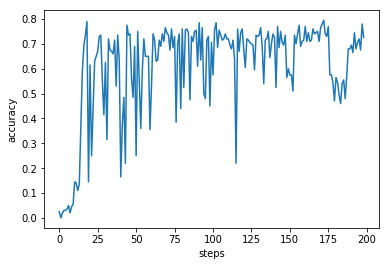

In [29]:
import matplotlib.pyplot as plt
plt.plot(accurracies)
plt.xlabel('steps')
plt.ylabel('accuracy')
plt.show()

### Upload results on Gym OpenAI

In [32]:
gym.upload('FrozenLake-record', api_key='your_key')

[2017-08-25 18:05:32,374] [FrozenLake-v0] Uploading 49800 episodes of training data
[2017-08-25 18:05:36,716] [FrozenLake-v0] Uploading videos of 59 training episodes (5109 bytes)
[2017-08-25 18:05:37,218] [FrozenLake-v0] Creating evaluation object from FrozenLake-record with learning curve and training video
[2017-08-25 18:05:37,597] 
****************************************************
You successfully uploaded your evaluation on FrozenLake-v0 to
OpenAI Gym! You can find it at:

    https://gym.openai.com/evaluations/eval_UaLF7xtQSNyODLUblAhfVg

****************************************************
